In [1]:
# to auto reload the modified module
% load_ext autoreload
% autoreload 2

In [8]:
import tensorflow as tf
import numpy as np
import random
import os
from nn_kd import TeacherNN
from layers import FC, Dropout
from utils import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
def check_obj(obj_str):
    obj = eval(obj_str)
    obj_type = type(obj)
    print(obj_str
        , obj_type
        , end = ' '
        )
    if obj_type == np.ndarray:
        print(obj.shape)
    else:
        try:
            iterator = iter(obj)
        except TypeError:
            # not iterable
            print(obj)
        else:
            # iterable
            print(len(obj))

In [4]:
# session settings
session = create_session(gpu_id='0')
# seed settings
set_rand_seed(0)

In [ ]:
try_reg2 = True
if try_reg2:
#         X_data = np.random.random((6000))[:, np.newaxis]*100
#         noise = np.random.normal(0, 0.05, X_data.shape).astype(np.float32)*0
#         y_data = X_data*2 + 1 + noise
    X_data = np.linspace(-10,10,5000, dtype=np.float32)[:, np.newaxis]
    np.random.shuffle(X_data)
    noise = np.random.normal(0, 10, X_data.shape).astype(np.float32)
    y_data = np.square(X_data) - 0.5 + noise
    print('X_data',X_data.shape,'\n',X_data[:5])
    print('y_data',y_data.shape,'\n',y_data[:5])
    
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)
    
    input_dims = X_train.shape[1]
    col_0 = TeacherNN(
        input_dims=input_dims
        , output_dims=1
        , session=session
        , dtype_X=tf.float32, dtype_y=tf.float32
    )
    col_0.add_layer(
        FC(inputs=col_0.h[-1],out_dims=256,activation_fn=tf.nn.relu)
    )
    col_0.add_layer(
        FC(inputs=col_0.h[-1],out_dims=1,activation_fn=None)
    )
    col_0.compile_nn(
#         loss=tf.reduce_mean(tf.reduce_sum(tf.square(col_0.ys - col_0.prediction),reduction_indices=[1]))
        loss=tf.losses.mean_squared_error(col_0.ys,col_0.prediction)
        ,opt=tf.train.AdamOptimizer(learning_rate=1e-3)
#         ,opt=tf.train.GradientDescentOptimizer(learning_rate=1e-1)
#         ,mectrics=[]
    )
    col_0.train(
        X=X_train
        , y=y_train
#         , val_set=[X_val,y_val]
        , batch_size=32
        , n_epochs=200
        , display_steps=100
    )

In [ ]:
if try_reg2:
    col_0.plt_loss()
    col_0.plt_metrics()
    test_metric = col_0.get_metrics(X_test, y_test)
    print(test_metric)

In [5]:
try_cls2 = True
if try_cls2:
    from tensorflow.examples.tutorials.mnist import input_data

    mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
    X_train = mnist.train.images#.astype(np.float64)
    y_train = mnist.train.labels#.astype(np.float64)
    X_val = mnist.validation.images
    y_val = mnist.validation.labels
    X_test = mnist.test.images
    y_test = mnist.test.labels
    check_obj('X_train')
    check_obj('y_train')
    input_dims = X_train.shape[1]
    output_dims = y_train.shape[1]
    check_obj('input_dims')
    check_obj('output_dims')
    col_cls_0 = TeacherNN(
        input_dims=input_dims
        , output_dims=output_dims
        , session=session
        , dtype_X=tf.float32
        , dtype_y=tf.float32)
#     col_cls_0.add_fc(512,activation_fn=tf.nn.relu)
#     col_cls_0.add_fc(256,activation_fn=tf.nn.relu)
#     col_cls_0.add_fc(128,activation_fn=tf.nn.relu)
#     col_cls_0.add_fc(output_dims,activation_fn=tf.nn.softmax)
    
    col_cls_0.add_layer(
        FC(inputs=col_cls_0.h[-1],out_dims=512,activation_fn=tf.nn.relu))
    col_cls_0.add_layer(
        FC(inputs=col_cls_0.h[-1],out_dims=256,activation_fn=tf.nn.relu))
    col_cls_0.add_layer(
        FC(inputs=col_cls_0.h[-1],out_dims=128,activation_fn=tf.nn.relu))
    col_cls_0.add_layer(
        FC(inputs=col_cls_0.h[-1],out_dims=output_dims,activation_fn=tf.nn.softmax))
    
    col_cls_0.compile_nn(
        loss=tf.losses.softmax_cross_entropy(col_cls_0.ys,col_cls_0.logits)
        , opt=tf.train.AdamOptimizer(learning_rate=1e-3)
        , metrics = ['acc'])
    col_cls_0.train(
        X=X_train
        ,y=y_train
        ,val_set=[X_val,y_val]
        ,batch_size=64
        ,n_epochs=5
        ,display_steps=100)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
X_train <class 'numpy.ndarray'> (55000, 784)
y_train <class 'numpy.ndarray'> (55000, 10)
input_dims <class 'int'> 784
output_dims <class 'int'> 10
Epoch 1 , step 0 , loss= 1.7756177 val_loss= 2.1809766 , acc = 0.484375 val acc = 0.207 
Epoch 1 , step 100 , loss= 0.26192498 val_loss= 0.24738692 , acc = 0.875 val acc = 0.9292 
Epoch 1 , step 200 , loss= 0.14382651 val_loss= 0.18208796 , acc = 0.953125 val acc = 0.9478 
Epoch 1 , step 300 , loss= 0.13600037 val_loss= 0.19546863 , acc = 0.984375 val acc = 0.9422 
Epoch 1 , step 400 , loss= 0.15947714 val_loss= 0.14965707 , acc = 0.953125 val acc = 0.9568 
Epoch 1 , step 500 , loss= 0.06713743 val_loss= 0.12177727 , acc = 0.96875 val acc = 0.9646 
Epoch 1 , step 600 , loss= 0.06023174 val_loss= 0.13682628 , acc = 1.0 val acc = 0.9612 
Epoch 1 , step 700 

Plotting loss...


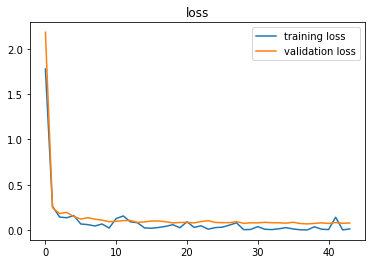

Plotting metrics...


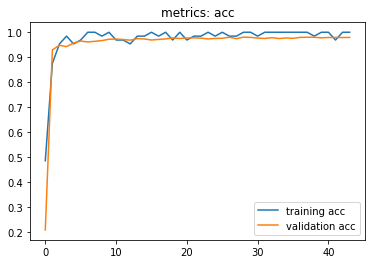

{'acc': 0.9775}


In [6]:
if try_cls2:
    col_cls_0.plt_loss()
    col_cls_0.plt_metrics()
    test_metric = col_cls_0.get_metrics(X_test, y_test)
    print(test_metric)

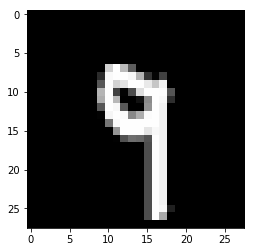

[[0.00e+00 0.00e+00 1.00e-04 1.00e-04 1.06e-02 0.00e+00 0.00e+00 1.00e-04
  1.00e-04 9.89e-01]]
[[0.0611 0.0761 0.0871 0.0942 0.1482 0.0687 0.0468 0.0895 0.0951 0.2332]]


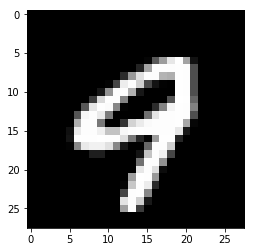

[[0.     0.     0.     0.     0.0028 0.     0.     0.     0.     0.9972]]
[[0.0567 0.0465 0.0888 0.0763 0.1741 0.0622 0.0399 0.078  0.0643 0.3132]]


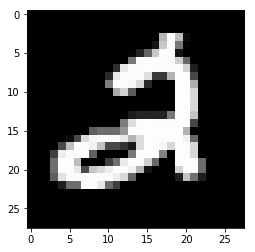

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[[0.0646 0.0617 0.445  0.0915 0.077  0.0481 0.0555 0.0559 0.0597 0.0411]]


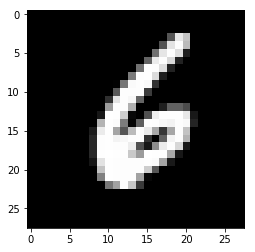

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[0.0958 0.053  0.048  0.0555 0.0672 0.1161 0.3935 0.0325 0.0824 0.056 ]]


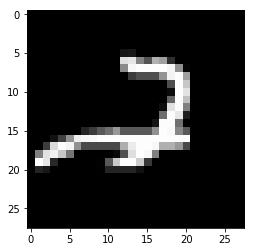

[[0.     0.     0.9952 0.     0.0048 0.     0.     0.     0.     0.    ]]
[[0.0829 0.0794 0.282  0.0936 0.1653 0.0531 0.066  0.0752 0.0426 0.06  ]]


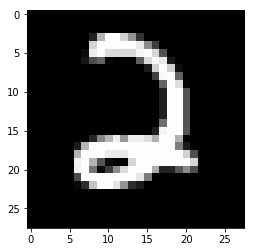

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[[0.063  0.07   0.4647 0.1014 0.0593 0.0415 0.0496 0.0612 0.0618 0.0274]]


In [30]:
if try_cls2:
    n_samples = 6
    temperature = 10
    n_data = X_test.shape[0]
    indices = np.random.choice(n_data,n_samples)
    for i in range(n_samples):
        sample = X_test[[indices[i]]]
        plt.imshow(sample.reshape((28,28)), cmap='gray')
        plt.show()
        pred = col_cls_0.predict(sample)
        pred_t = col_cls_0.predict_with_t(sample, temperature=temperature)
        print(np.round(pred,4))
        print(np.round(pred_t,4))
        #     col_cls_0.predict()

In [ ]:
close_session(session)